<img src="files/QHack_poster.png" >

<img src="files/MA_RGB_Blue.jpg" width="200">

<font color=blue>
    
# The path to Quantum in production in the Financial Industry 
# The use case of Quantum Monte Carlo Simulation 

</font>

## Learning objectives of the challenge

**MAIN LEARNING OBJECTIVES**
1. Mapping a real problem to a quantum circuit. 
2. Programming quantum circuits. 
3. Optimizing quantum algorithms. 

**ABOUT THE INDUSTRY**

<div class="alert alert-block alert-success">
    
- What are the companies with potential use cases of quantum computing doing right now to prepare? 
    
- Why do financial institutions need to invest in Quantum Computing?
    
- What innovation framework do companies use to decide what emerging technology should be investigated?
    
</div>



**ABOUT THE PROBLEMS. SIZE. CLASSICAL METHODS. AND ~QUANTUM~ BUSINESS ADVANTAGE**
<div class="alert alert-block alert-success">

* What is the size of the problems real companies need to solve in production and when does quantum become relevant?

* What state of the art methods would quantum have to compete with?

* What benchmarks should we do to decide if we substitute a classical method with a quantum one?

* Should we talk about quantum advantage or business advantage?
    
</div>

**ABOUT INTEGRATION AND "QuantumOps"**

<div class="alert alert-block alert-success">

* What tools/ libraries need to be used in order to integrate quantum with other accelerators such as GPUs/ CPUs/ FPGAs etc?

* How do you orchestrate all the resources needed to solve a production size problem?

* How to manage the life cycle of a model in production?

* How do we integrate a quantum computer, with the current infrastructure a company has?

* How do we integrate a quantum solver with the current software products a company has?

* What are all the layers that we have to take into consideration when using a quantum computer in production? </div>

## The challenge

### Problem Statement 

Let $S_t$ be a stochastic process indexed by time $t$. Let the dynamics of $S_t$ be given by:

**Eq. (1)** $$ dS_t = \mu S_t dt + \sigma S_t dW_t $$ 

where $S_0=50$, $\mu= 0.1$ and $\sigma= 0.2$ are constants, and $dW_{t}$ is change in a standard Gaussian process in $dt$ time and can be thought of as:

$$dW_t=\mathcal{N}(0,1)\sqrt{dt}$$


This kind of stochastic process is known as a geometric Brownian motion (GBM) (also known as exponential Brownian motion).


### SECTION 1: The classical solution. Monte Carlo Simulation.

Using the above write a simulation code to compute:

* $\mathbb{E}[S_T]$

where T=10

Some theory:

* The expectation of a random variable can be estimated by averaging samples (let $X \stackrel{}{\sim} p(x)$):
$$\mathbb{E}[X]= \int xp(x)dx \approx \frac{1}{N}\sum_{j=1}^{N}X_j $$

* When performed on a digital computer (classical or quantum), any continuous $p(x)$ must be truncated and discretised:
$$\mathbb{E}[X]= \sum_x xp(x) \approx \frac{1}{N}\sum_{j=1}^{N}X_j $$


<div class="alert alert-block alert-warning">
<b>Hints:</b> 
    
- Discretize the time between t=0 to t=T in 100 steps.
- Use **Eq. (1)** to generate 10000 paths between t=0 to t=T (discretize the differential equation.)
- Compute the expectation by averaging over the paths.
- Another option is to use the analytical solution of the SDE, which is possible for this Stochastical Differential equation.
    
</div>


This problem is usually solved using Monte Carlo simulation. Monte Carlo sampling is a set of techniques that randomly generate numerical quantities for the purpose of simulating a statistical distribution or computing a moment or other expectation thereof (e.g., mean, variance).

# QROISSANTS GROUP

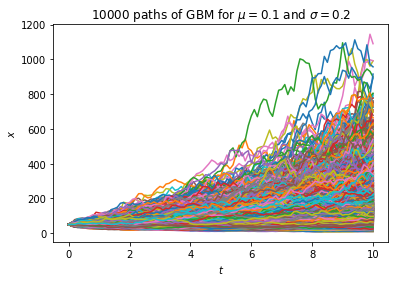

In [5]:
# Write your code here

import numpy as np
import matplotlib.pyplot as plt

#Parameters of the distribution
mu = 0.1
sigma = 0.2
S0 = 50

#We want to simulate npaths=10000 paths of the r.v
#for tha we discretize the time from t=0 to T=10 in n=100 steps

n = 100
npaths=10000
T=10
dt =T/n

np.random.seed(1)

s = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(npaths,n)).T
)
    
s = np.vstack([np.ones(npaths), s])
s = S0 * s.cumprod(axis=0)

#This is for scaling the x axis correctly to 0 to T=10 in 100 steps
time=np.linspace(0,T,n+1)
t=np.full(shape=(npaths,n+1),fill_value=time).T

#Plot the paths
plt.plot(t,s)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "10000 paths of GBM for $\mu=0.1$ and $\sigma=0.2$"
)
plt.show()

In [8]:
#We calculate the expectation by averaging over the samples
expectation_numerical=sum(s[100])/npaths
expectation_numerical

136.72956192663435

In [7]:
# E_ST
#We compare with the theoretical result given by the analytical solution
#E=S_0*exp(mu*t)

expectation_analytical=S0*np.exp(mu*10)
expectation_analytical

135.91409142295225

In [ ]:
#As we can see we get quite similar results 


### SECTION 2: The Quantum solution. Quantum Monte Carlo Integration + QAE
Now you are required to derive:
* $\mathbb{E}[max(S_T-100, 0)]$ 

with a quantum computer using the Quantum Amplitude Estimation Algorithm.

Some more theory:

* We may want to estimate the expectation when a function is applied to the samples:

$$\mathbb{E}[f(X)]= \sum_x f(x)p(x) \approx \frac{1}{N}\sum_{j=1}^{N}f(X_j) $$


* Monte-Carlo Integration is a three step process:

<div class="alert alert-block alert-info">
Prepare samples -> Apply a function -> average
</div>


* and Quantum Monte-Carlo Integration is essentially the same:

<div class="alert alert-block alert-info">
Prepare a state -> Apply circuit encoding the function -> QAE algorithm
</div>


#### BACKGROUND OF THE ALGORITHM

Quantum Amplitude Estimation (QAE) __[[1]](https://arxiv.org/abs/quant-ph/0005055)__  is a fundamental quantum algorithm with the potential to achieve a quadratic speedup for many applications that are classically solved through Monte Carlo (MC) simulation. 

This algorithm could provide an advantage in some relevant applications in the financial sector. In fact, it has been shown how to apply QAE to the problems of option pricing __[[2]](https://arxiv.org/abs/1905.02666)__, risk analysis __[[3]](https://www.nature.com/articles/s41534-019-0130-6)__, __[[4]](https://arxiv.org/abs/2212.07125)__, __[[5]](https://www.mdpi.com/1099-4300/25/4/593)__ and also for generical tasks such as numerical integration __[[6]](https://arxiv.org/abs/1504.06987)__, among others.

<div class="alert alert-block alert-info">
While the estimation error bound of classical MC simulation scales as O(1/√M), where M denotes the number of (classical) samples, QAE achieves a scaling of O(1/M) for M (quantum) samples, indicating the aforementioned quadratic speedup.

</div>


QAE was first proposed in 2000 by Brassard and others. However, the first version of the algorithm, that is, the canonical version, requires a very high number of qubits and circuit depth, which makes it impractical in today’s NISQ devices. QAE combines Quantum Phase Estimation (QPE) and Grover’s Algorithm.  Later studies have focused on how to optimize the QAE algorithm. The strategy has been to remove the QPE-dependency and use only Grover iterations. It has been empirically observed that including QPE in QAE does not have any advantages, it only increases the complexity. Moreover, the removal of the QPE-dependency has resulted in reducing the resource requirements of QAE, bringing closer the possibility of practical applications of QAE in the near-term.


There are 3 main pain points to work on when solving a problem with this algorithm:
1. Uploading the initial probability distribution.
2. Computation = iterations of the algorithm (circuit depth).
3. Measuring and Post processing.

Each  of the parts have their own challenge, and in order to maintain the theoretical quadratic speedup, we have to efficiently solve each of the steps.

There are different versions of QAE:

* Canonical QAE __[[1]](https://arxiv.org/abs/quant-ph/0005055)__
* Maximum Likelihood Amplitude Estimation MLAE __[[2]](https://arxiv.org/abs/1904.10246)__
* QAE Simplified QAES __[[3]](https://arxiv.org/abs/1908.10846)__
* Iterative QAE IQAE __[[4]](https://arxiv.org/abs/1912.05559)__
* Variational QAE __[[5]](https://arxiv.org/abs/2109.03687)__

and more.

In order to do Quantum Monte-Carlo Integration one may choose among the different versions of QAE.

In a recent paper, Steven Herbert proposes a method to do Quantum-monte Carlo Integration called Fourier QMCI __[[6]](https://arxiv.org/abs/2105.09100)__ that provides an optimal way to do the step of encoding the function into a circuit.

For more information on Quantum proposals to enhance Monte Carlo methods, read __[A Survey of Quantum Alternatives to Randomized Algorithms: Monte Carlo Integration and Beyond](https://arxiv.org/abs/2303.04945)__

You are required to work on the 3 steps mentioned above, and hand in the outputs defined below.

In [2]:
%matplotlib inline


from qiskit import QuantumCircuit,  IBMQ
from qiskit import Aer
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Estimator, Options
from qiskit.algorithms import IterativeAmplitudeEstimation, EstimationProblem, MaximumLikelihoodAmplitudeEstimation
from qiskit.circuit.library import LinearAmplitudeFunction
from qiskit_aer.primitives import Sampler
from qiskit_finance.circuit.library import LogNormalDistribution


# Loading your IBM Q account(s)
IBMQ.save_account('a68087d9c262053b5e20eea6f7d5dd9a02252efbc722cc8774bde7a6b69f71b9b077e3cd8541be84c5841c130f3d8f1c4d3940bf42ccbd3f1caae0d843c42976')

<ipython-input-2-8746d8d3469e>:14: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('a68087d9c262053b5e20eea6f7d5dd9a02252efbc722cc8774bde7a6b69f71b9b077e3cd8541be84c5841c130f3d8f1c4d3940bf42ccbd3f1caae0d843c42976')
<ipython-input-2-8746d8d3469e>:14: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('a68087d9c262053b5e20eea6f7d5dd9a02252efb

# Expected Outputs

## 1. Data uploading step. 
* Explore different techniques to efficiently upload the stochastic process. Choose and implement the technique you want and justify why. For simulation experiments, you may choose the number of samples in the probability distribution you want to consider, we recommend to start with 4. 

<font color=red>
Optional. Advanced exercise. (We recommend to try this after solving the rest of the challenge). Try to encode a Cox-Ingersoll-Ross process into a quantum computer. What about a Heston model?</font> 


<div class="alert alert-block alert-warning">
<b>Hints:</b> 
    
- Read __[The Problem with Grover-Rudolph State Preparation for Quantum Monte-Carlo](https://arxiv.org/abs/2101.02240)__ to understand why efficiently doing this step is important.
    
- __[qGAN](https://www.nature.com/articles/s41534-019-0223-2)__ have been proposed as an alternative promising way of efficiently uploading data.
    
- Read about stochastic processes uploading in __[Quantum-enhanced analysis of discrete stochastic processes](https://www.nature.com/articles/s41534-021-00459-2)__
    
</div>

In [9]:
# Write your code here

# number of qubits to represent the uncertainty
num_samples_qubits = 4

# parameters for considered random distribution
S0 = 50  
T = 10

#parameters for log-normal distribution
mu = 0.1
sigma = 0.2

mean = np.exp(mu + sigma**2 / 2)
variance = (np.exp(sigma*2) - 1) * np.exp(2 * mu + sigma*2)
stddev = np.sqrt(variance)


#lowest and highest value considered 
low = np.maximum(0, mean - 3 * stddev)
high = mean + 3* stddev

#We construct a circuit to load a log-normal random distribution into a quantum state.
preparation_model = LogNormalDistribution(
    num_samples_qubits, mu=mu, sigma=sigma**2, bounds=(low, high)
)

In [10]:
preparation_model.num_qubits

4

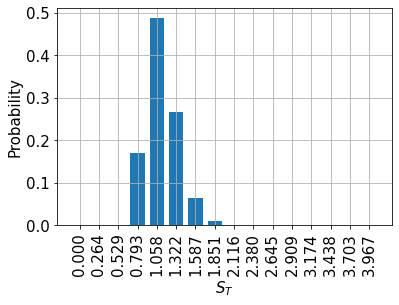

In [11]:
# plot probability distribution
x = preparation_model.values
y = preparation_model.probabilities
plt.bar(x, y, width=0.2)
plt.xticks(x, size=15, rotation=90)
plt.yticks(size=15)
plt.grid()
plt.xlabel("$S_T$", size=15)
plt.ylabel("Probability", size=15)
plt.show()


## 2. QAE. 
* You are asked to implement Fourier QMCI __[[6]](https://arxiv.org/abs/2105.09100)__ and apply it to the function described in the problem statement $max(S_T-100, 0)$
* What benefits does it have vs the other versions? 


<div class="alert alert-block alert-warning">
<b>Hints:</b> 
    
- You do not need to derive the circuits of each version of QAE from scratch. Qiskit has some of the versions of QAE implemented as classes. You can explore the circuits using these classes. Check them out __[here](https://qiskit.org/documentation/apidoc/algorithms.html)__.
- Qiskit can also help deriving the __[circuit depth](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.depth.html)__.
- Note that Fourier QMCI can make use of any of the versions of QAE.
    
</div>

In [39]:
# Write your code here

In [ ]:
sim=Aer.get_backend('qasm_simulator')

In [12]:
num_samples_qubits = 4 #this number should be a power of 2
num_qubits = num_samples_qubits + 1 #add the target qubit that we will measure

circuit = QuantumCircuit(num_qubits)
circuit.append(preparation_model, range(num_samples_qubits))

def controlled_rotations(num_control_qubits, angle):
    qc = QuantumCircuit(num_control_qubits+1)
    #do the  controlled rotations
    for i in range(num_control_qubits-1, -1, -1):
        qc.cry(2**(num_control_qubits-1-i)*angle, control_qubit=i,target_qubit=num_control_qubits)
    return qc.to_gate()

#The bounds of the support of f(x)
x_l = 0.01
x_u = 0.3*sigma

num_fourier_terms = 4
P = (x_u-x_l) #period of the periodic function
delta = (x_u-x_l)/(2**num_samples_qubits-1)  #step in the discretized space

#Initialize sampler to run circuits
#service = QiskitRuntimeService(channel='ibm_quantum')
#backend = service.backend('ibmq_qasm_simulator') #choose the simulator or device
sampler = Sampler()


#Arrays where fourier terms are stored
fourier_terms_cos = []
fourier_terms_sin = []

for n in range(num_fourier_terms):
    w = 2*np.pi/P  #phase of the fourier terms
    theta = n*w*delta  

    alpha_cos=2*(np.pi)*x_l
    alpha_sin=2*(np.pi)*x_l+np.pi/2

    #circuit must be reinitialized everytime
    circuit_fourier=circuit.copy()

    #distinguish two cases:

    #If we want to estimate the cos term:
    circuit_sin=circuit_fourier.copy()
    circuit_sin.ry(alpha_cos,num_samples_qubits)
    circuit_sin.append(controlled_rotations(num_samples_qubits,theta),range(num_qubits))
    #run QAE for the cos term
    problem = EstimationProblem(circuit_sin, objective_qubits = num_samples_qubits)
    mlae = MaximumLikelihoodAmplitudeEstimation(evaluation_schedule = 3, sampler = sampler)
    mlae_result = mlae.estimate(problem)
    fourier_terms_cos.append(1-2*mlae_result.estimation)
    print("Estimate of a_",n+1,"is",1-2*mlae_result.estimation)

    
    #If we want to estimate the sin term:
    circuit_cos=circuit_fourier.copy()
    circuit_cos.ry(alpha_sin,num_samples_qubits)
    circuit_cos.append(controlled_rotations(num_samples_qubits,theta),range(num_qubits))
    #run QAE for the sin term
    problem = EstimationProblem(circuit_cos, num_samples_qubits)
    mlae = MaximumLikelihoodAmplitudeEstimation(evaluation_schedule = 3, sampler = sampler)
    mlae_result = mlae.estimate(problem)
    fourier_terms_sin.append(1-2*mlae_result.estimation)
    print("Estimate of b_",n+1,"is",1-2*mlae_result.estimation,"\n")

Estimate of a_ 1 is 0.9978155075578983
Estimate of b_ 1 is -0.06358900782285337 

Estimate of a_ 2 is 0.20052817899999487
Estimate of b_ 2 is -0.017376020800557557 

Estimate of a_ 3 is -0.32381005743777047
Estimate of b_ 3 is -0.5252315182395526 

Estimate of a_ 4 is -0.26374643572168366
Estimate of b_ 4 is -0.4232909193278498 



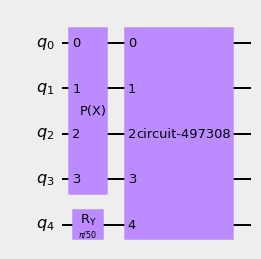

In [345]:
circuit_sin.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

In [38]:
#New version to compute coefficients
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#x = np.linspace(45, 144, 100)
#y = np.piecewise(x, [((x >= 45) & (x <= 100)), ((x >= 100) & (x < 145))], [0, lambda x: x-100])
#plt.plot(x, y)
def f(x):
    return np.piecewise(x, [((x >= 45) & (x <= 100)), ((x >= 100) & (x < 145))], [0, lambda x: x-100])
    

#t is the independent variable
x_l = 50
x_u = 107
P = (x_u-x_l) #period value

BT=0. #initian value of t (begin time)
ET=10. #final value of t (end time)
FS=100 #number of discrete values of t between BT and ET

#all discrete values of t in the interval from BT and ET
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)

#function that computes the real fourier couples of coefficients (a0, 0), (a1, b1)...(aN, bN)
def compute_real_fourier_coeffs(func, N):
    result = []
    for n in range(N+1):
        an = (2./P) * spi.quad(lambda t: func(t) * np.cos(2 * np.pi * n * t / P), 0, P)[0]
        bn = (2./P) * spi.quad(lambda t: func(t) * np.sin(2 * np.pi * n * t / P), 0, P)[0]
        result.append((an, bn))
    return np.array(result)

def fit_func_by_fourier_series_with_real_coeffs(t, AB):
    result = 0.
    A = AB[:,0]
    B = AB[:,1]
    for n in range(0, len(AB)):
        if n > 0:
            result +=  A[n] * fourier_terms_cos[n] + B[n]* fourier_terms_sin[n]
        else:
            result +=  A[0]
    return result



def f(t):
    return max(np.exp(mu*t) - 100, 0)

AB = compute_real_fourier_coeffs(f,num_fourier_terms-1 )
est = fit_func_by_fourier_series_with_real_coeffs(0, AB)
print(est)

44.698394965554456


In [324]:
#The results for different values of n (precission of Fourier)

#44.698394965554456 for n=4
#41.10875168637083 for n=8 
#48.88444858978799 for n=12
#37.715743030433934 for n=16 
#45.077490680927184 for n=20
#48.90604298278019 for n=32

In [ ]:
#We choose the Maximum Likelihood Amplitude estimation because it is one of the fastest ones and it is
#also subject to paralelization for a more efficient use

# 3. Execution
* Let's think about parallelization: What versions of QAE can be parallelized? At which level (iteration/shot)? When does it become relevant? What advantage does it bring compared to a sequential execution?
* Explain how you would parallelize the Fourier QMCI and the QAE you have chosen if that QAE version can be paralellized.
* Define a workload of tasks and orquestrate its execution. Include any assumptions you make (e.g. I have access to 20 Quantum Computers based in the same data center...).
* Compare the different approaches.


<div class="alert alert-block alert-warning">
<b>Hints:</b> 
    
- Read the steps of the algorithm and think whether iterations depend on the previous one or the can be done simultaneously in different quantum backends. 
_ Think about how to parallelize Fourier QMCI.
- Think about the number of iterations, circuit depth, and the number of shots.
- Use __[covalent.xyz](https://www.covalent.xyz)__ to define a workflow of the things you need to execute.
- Check the opensource platform __[NVIDIA CUDA Quantum](https://developer.nvidia.com/cuda-quantum)__ and their view on orchestration of hybrid workflows. 
- __[Orquestra](https://www.orquestra.io)__ by Zapata Computing is not open source, but may also give you some ideas.
    
- <font color=red> (Optional. Avanced) Other proposals __[Error Resilient Quantum Amplitude Estimation from Parallel Quantum Phase Estimation](https://arxiv.org/abs/2204.01337)__ </font>
    
</div>

# Write your code here

# Parallelization
The for loop in which the terms of the Fourier series are computed is heavily parallelizable. This becomes useful when the number of terms of the Fourier series, n, becomes large, since in this situation the advantage brought by parallelization overcomes its overhead (needed to initialize processes etc.). We can divide the iteration in p parts, where p is the number of processes available. Then the process with rank r will run the iteration from step r*(n/p) to step (r+1)*(n/p)-1. 

The for loop in which the coefficients for the Fourier series are computed can also be easily parallelized in a similar was, but the speedup will be less significant, as the operations in this for loop have complexity O(1), resulting in a total complecuty of O(n).

The QAE implementation that can be parallelized is MaximumLikelihoodAmplitudeEstimation \[Suzuki et al.].

<font color=red>

## 4. Noise analysis step (Optional. Advanced.)

(We recommend to try this after solving the rest of the challenge).
    
* Can you execute QMC in NISQ devices?
* How would you execute it in a quantum backend?
* How did you compile the circuits? What is the circuit depth after transpilation?
* Did you use any noise mitigation technique? If yes, explain which one and how if affected the results.
    
</font>




<div class="alert alert-block alert-warning">
<b>Hints:</b> 

- You can use an open backend from IBM Quantum, or an Aer simulator.
    
- Check this paper about __[Noise-Aware QAE](https://arxiv.org/abs/2109.04840)__

- You can use __[Fire Opal](https://q-ctrl.com/fire-opal)__ to optimize your results. __[Documentation](https://docs.q-ctrl.com/fire-opal/user-guides/how-to-set-up-your-environment-and-install-fire-opal)__


    
</div>




In [ ]:
# Write your code here

## 5. Benchmarking
* Do you estimate this use case will benefit from NISQ devices or do we need Fault Tolerant Quantum computers?
* What metric would be more appropiate to compare the performance of your Quantum Monte Carlo solver vs the current classical methods?
* <font color=red> (Optional. Advanced) Assume you are a quant at a financial firm. You need to apply Monte Carlo simulation to price (i.e. the expectation of the total assets value) of a portfolio of fixed-income assets (e.g. 10k assets). An accuracy of the order of epsilon = 10e-6 is needed. Notice that the underlying uncertainty of fixed-income assets stems from interest rate and they do not have to follow a GBM like model. For simplicity, take into account that interest rates are only modeled up to one period (T=1), resulting on one-dimensional distribution. There are other models typically used to model the paths of interest rates. Make a rough but reasonable estimation of the quantum hardware resources needed to implement quantum Monte Carlo simulation for this set up. </font>


Cite your references.

In [ ]:
# Write your code here

## 6. Pitch your quantum strategy to a client: a bank
Imagine you are part of the Quantum team at Moody's. You are meeting the CIO of an important bank in the US, and you need to convince him/her in 5 minutes about why they should start investing in quantum computing today, and define the steps of a high level roadmap they would need to follow to get quantum ready. You can use the Quantum Monte Carlo use case as a proof of concept to support your pitch. 

You may use up to 3 slides, including roadmap, PoC results and executive summary on why to invest in quantum today.


<div class="alert alert-block alert-warning">
<b>Hints:</b> 
    
- Research what is an executive summary, and an elevator pitch, and try to follow some of the ideas of these communication tools.
- Think about the person you are presenting to. Are they technical people? What is important to them? Build a empathy map to help you build the right message.

</div>

<img src="files/empathymap.png"  width="200">

In [5]:
# Build your presentation and rehearse your pitch!

# This is the end of the challenge. Good luck...

<img src="files/keepcalm.png"  width="200">